In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

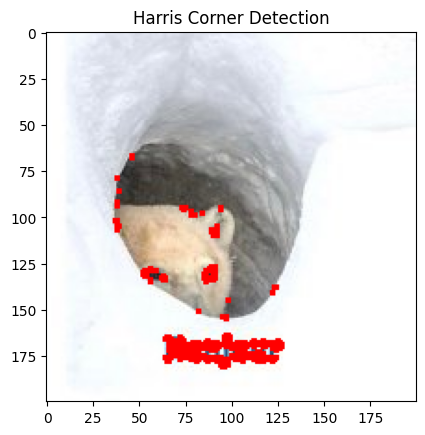

array([[[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [254, 252, 251],
        [254, 252, 251],
        [254, 252, 251]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
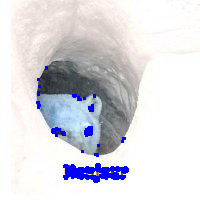

In [24]:
# Load the image from the GitHub repository
url = "https://github.com/themselg04/cv2practice/blob/main/Harris%20Corner%20Detection/oso.jpg?raw=true"
response = requests.get(url)
img1 = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection
dst1 = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.01)
dst1 = cv2.dilate(dst1, None)
img1[dst1 > 0.01 * dst1.max()] = [0, 0, 255]

# Display the image with detected corners using pyplot.imshow
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()
img1

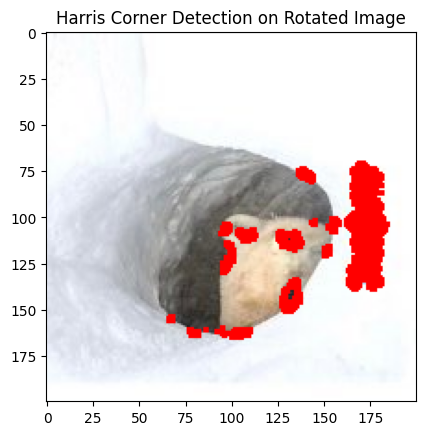

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 254],
        [254, 252, 251],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [254, 252, 251],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
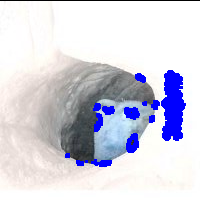

In [25]:
rotation_degree = 90

img2 = img1.copy()
height, width = img2.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_degree, 1)
img2 = cv2.warpAffine(img2, rotation_matrix, (width, height))
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection
dst2 = cv2.cornerHarris(gray2, blockSize=2, ksize=3, k=0.01)
dst2 = cv2.dilate(dst2, None)
img2[dst2 > 0.01 * dst2.max()] = [0, 0, 255]

# Display the image with detected corners using pyplot.imshow
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection on Rotated Image')
plt.show()
img2


In [26]:
def calculate_corner_histograms(img, dst, patch_size=15):
  corner_histograms = []
  corners = np.argwhere(dst > 0.001 * dst.max())

  for corner in corners:
    y, x = corner
    # Extract a patch around the corner
    patch = img[max(0, y - patch_size // 2):min(img.shape[0], y + patch_size // 2),
              max(0, x - patch_size // 2):min(img.shape[1], x + patch_size // 2)]

    # Calculate the histogram for the patch (e.g., using HSV color space)
    hsv_patch = cv2.cvtColor(patch, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_patch], [0, 1], None, [8, 8], [0, 180, 0, 256])
    corner_histograms.append(hist.flatten())

  return corner_histograms

In [27]:
corner_histograms1 = calculate_corner_histograms(img1, dst1)
corner_histograms2 = calculate_corner_histograms(img2, dst2)
print(len(corner_histograms1))
print(len(corner_histograms2))

2252
2864


In [36]:
to_search = 550

best_match = 0
for i in range(len(corner_histograms2)):
  comp = cv2.compareHist(corner_histograms1[to_search], corner_histograms2[i], cv2.HISTCMP_CORREL)
  if comp > best_match:
    best_match = comp
    best_match_index = i

print(best_match)
print(best_match_index)

0.9769239522314055
2668


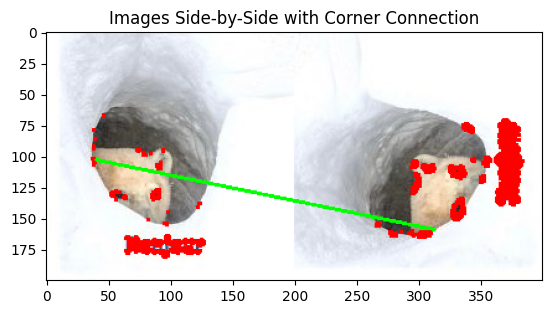

In [37]:
combined_img = np.concatenate((img1, img2), axis=1)

y1, x1 = np.argwhere(dst1 > 0.001 * dst1.max())[to_search]
y2, x2 = np.argwhere(dst2 > 0.001 * dst2.max())[best_match_index]

# Draw a line between the two corners
cv2.line(combined_img, (x1, y1), (x2 + img1.shape[1], y2), (0, 255, 0), 2)

# Display the combined image with the connecting line
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.title('Images Side-by-Side with Corner Connection')
plt.show()